In [1]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np
import numpy
import PIL
from PIL import Image
np.random.seed(1337)  # for reproducibility

import random
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import RMSprop
from keras import backend as K
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate


def euclidean_distance(x, y):
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def conc(vects):
    x, y = vects
    conc1 = concatenate([x,y])
    return conc1

def conc_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],256)

def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    x = y_pred[:,0:128]
    y = y_pred[:,128:268]
    y_pred1 = euclidean_distance(x,y)
    p = x
    q = y
    p = K.clip(p, K.epsilon(), 1)
    q = K.clip(q, K.epsilon(), 1)
    #y_true1 = y_true[:,0]
    #y_true1 = K.reshape(y_true1,(-1,))
    #print(y_true1)
    #tr_same = y_true[:,1]
    #tr_same = K.reshape(tr_same, (-1,))
    y_true1 = y_true
    tr_same = K.round(y_true/3)
    margin = 1
    test = K.sum(p*(K.log(p)-K.log(q)), axis=1)

    return K.mean((1-tr_same)*(y_true1 * K.square(y_pred1) + (1 - y_true1) * K.square(K.maximum(margin - y_pred1, 0)))
                 + (tr_same)*test)


def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)


def create_base_network():
    '''Base network to be shared (eq. to feature extraction).
    '''
    seq = Sequential()
    seq.add(Conv2D(30, (5, 5), input_shape=(28, 28,1), activation='relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2)))
    seq.add(Dropout(0.2))
    seq.add(Flatten())
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(128, activation='relu'))
    return seq


def compute_accuracy(predictions, labels):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return labels[predictions.ravel() < 0.5].mean()



/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [202]:
d = contrastive_loss(y_t, b)

In [203]:
d.eval(session = tf.Session())

16.246183

In [145]:
print(tr_f.shape)
a = tr_f[:,1]
print(a)

(108400, 2)
[1 1 1 ... 1 1 1]


In [220]:
tr_final = np.array([tr_y, tr_same])
print(tr_final.shape)

(2, 108400)


In [226]:
print(tr_f[:,0])
print(tr_f[:,1])
print(tr_f[0:128])

[1 0 1 ... 0 1 0]
[1 1 1 ... 1 1 1]
[[1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]]


In [240]:
# train
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms)
model.fit([tr_pairs1[:,0], tr_pairs1[:, 1]], tr_y,
          validation_data=([te_pairs1[:,0], te_pairs1[:, 1]], te_y),
          batch_size=128,
          nb_epoch=nb_epoch)



/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 108400 samples, validate on 17820 samples
Epoch 1/5
108400/108400 [==============================] - 96s 886us/step - loss: 0.0226 - val_loss: 0.0174
Epoch 2/5
108400/108400 [==============================] - 75s 696us/step - loss: 0.0172 - val_loss: 0.0157
Epoch 3/5
108400/108400 [==============================] - 84s 772us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 4/5
108400/108400 [==============================] - 75s 688us/step - loss: 0.0127 - val_loss: 0.0142
Epoch 5/5
108400/108400 [==============================] - 80s 735us/step - loss: 0.0115 - val_loss: 0.0142


In [215]:
a = [tr_y, tr_same]
x, y =a
print(x.shape)

(108400,)


In [4]:
seed=7
numpy.random.seed(seed)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

In [6]:
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
input_dim = 784
nb_epoch = 20

In [251]:
print(tr_y*tr_same)

[1 0 1 ... 0 1 0]


In [252]:
tr_f = []
for i in range(0,tr_y.shape[0]):
    tr_f.append(tr_y[i])
    tr_f.append(tr_same[i])
tr_f = np.array(tr_f)
tr_f = tr_f.reshape(tr_y.shape[0],2,1)
print(tr_f.shape)

(108400, 2, 1)


In [253]:
tr_f = tr_f.reshape(-1,2)
print(tr_f.shape)

(108400, 2)


In [254]:
g = tr_y
g = g.reshape(-1,1)
print(g.shape)
g = g.reshape(-1)
print(g.shape)

(108400, 1)
(108400,)


In [11]:
# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(10)]
tr_pairs, tr_y = create_pairs(X_train, digit_indices)

digit_indices = [np.where(y_test == i)[0] for i in range(10)]
te_pairs, te_y = create_pairs(X_test, digit_indices)

In [12]:
base_network = create_base_network()

In [13]:

X_temp=X_train.reshape(-1,28,28,1)
input_dim = X_temp.shape[1:]
print(input_dim)

(28, 28, 1)


In [14]:

# network definition
base_network = create_base_network()

input_a = Input(shape=input_dim)
input_b = Input(shape=input_dim)

#input_a=K.reshape(input_a,(28,28,1))
#input_b=K.reshape(input_b,(28,28,1))
# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
print(input_b.shape)

(?, 28, 28, 1)


In [15]:
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(conc, output_shape=conc_shape)([processed_a, processed_b])

model = Model(input=[input_a, input_b], output=distance)

/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("la..., inputs=[<tf.Tenso...)`
  


In [16]:
print(distance.shape)
r = distance
r = K.reshape(r, (-1,256))
print(r.shape)

(?, 256)
(?, 256)


In [17]:
test_model = Model(input = input_a, output = processed_a)

/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("se..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [18]:
tr_pairs1=tr_pairs.reshape(-1,2,28,28,1)
te_pairs1=te_pairs.reshape(-1,2,28,28,1)

print(tr_pairs1.shape)
print(te_pairs1.shape)

(108400, 2, 28, 28, 1)
(17820, 2, 28, 28, 1)


In [19]:
print(tr_pairs1[:,0].shape)

(108400, 28, 28, 1)


In [20]:
print(tr_pairs[:, 1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


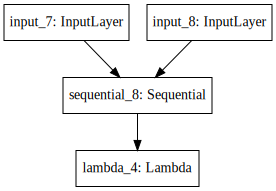

In [265]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

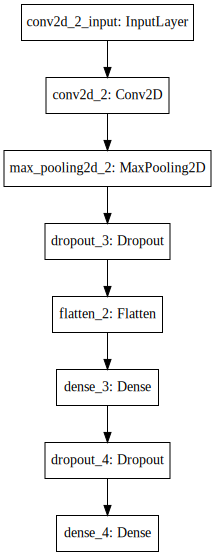

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(base_network).create(prog='dot', format='svg'))

In [21]:
nb_epoch=3

In [22]:
# train
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms)
model.fit([tr_pairs1[:,0], tr_pairs1[:, 1]], tr_y,
          validation_data=([te_pairs1[:,0], te_pairs1[:, 1]], te_y),
          batch_size=128,
          nb_epoch=nb_epoch)



/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 108400 samples, validate on 17820 samples
Epoch 1/3
108400/108400 [==============================] - 81s 749us/step - loss: 0.0587 - val_loss: 0.0206
Epoch 2/3
108400/108400 [==============================] - 77s 710us/step - loss: 0.0192 - val_loss: 0.0159
Epoch 3/3
108400/108400 [==============================] - 79s 724us/step - loss: 0.0139 - val_loss: 0.0162


In [20]:
# train
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms)
model.fit([tr_pairs1[:,0], tr_pairs1[:, 1]], tr_y,
          validation_data=([te_pairs1[:,0], te_pairs1[:, 1]], te_y),
          batch_size=128,
          nb_epoch=nb_epoch)



/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 108400 samples, validate on 17820 samples
Epoch 1/5
108400/108400 [==============================] - 84s 777us/step - loss: 0.0575 - val_loss: 0.0188
Epoch 2/5
108400/108400 [==============================] - 85s 787us/step - loss: 0.0191 - val_loss: 0.0151
Epoch 3/5
108400/108400 [==============================] - 86s 790us/step - loss: 0.0136 - val_loss: 0.0139
Epoch 4/5
108400/108400 [==============================] - 99s 913us/step - loss: 0.0109 - val_loss: 0.0119
Epoch 5/5
108400/108400 [==============================] - 102s 937us/step - loss: 0.0098 - val_loss: 0.0135


In [21]:
# compute final accuracy on training and test sets
pred = model.predict([tr_pairs1[:,0], tr_pairs1[:, 1]])
tr_acc = compute_accuracy(pred, tr_y)
pred = model.predict([te_pairs1[:,0], te_pairs1[:, 1]])
te_acc = compute_accuracy(pred, te_y)

print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 108400 but corresponding boolean dimension is 27750400

In [23]:
y_test1=[]
for i in range(0,10):
    for j in range(300,1300):
        y_test1.append(i)
y_test1=np.array(y_test1)
print(y_test1.size)
print(y_test1)

10000
[0 0 0 ... 9 9 9]


In [24]:
X_test1=[]
for i in range(0,10):
    for j in range(300,1300):
        img = PIL.Image.open("/home/aniruddha/Documents/USPSdataset/%d/%d.jpg" %(i,j)).convert("L")
        arr = np.array(img)
        # ravel to convert 28x28 to 784 1D array
        arr=arr.ravel()
        X_test1.append(arr)
X_test1=np.array(X_test1)
print(X_test1.shape)
print(X_test.shape)

(10000, 784)
(10000, 784)


In [26]:
X_test1 = X_test1.reshape(10000, 784)
X_test1 = X_test1.astype('float32')
X_test1 /= 255
print(X_test.shape)


digit_indices = [np.where(y_test1 == i)[0] for i in range(10)]
te_pairs, te_y = create_pairs(X_test1, digit_indices)

(10000, 784)


In [27]:
te_pairs2=te_pairs.reshape(-1,2,28,28,1)

print(te_pairs2.shape)

(19980, 2, 28, 28, 1)


In [43]:
pred = model.predict([te_pairs2[:, 0], te_pairs2[:, 1]])
te_acc = compute_accuracy(pred, te_y)

# compute accuracy on new USPS dataset to check degree of transfer learning
# model only trained on MNIST dataset
print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))

* Accuracy on test set: 89.87%


In [28]:
%matplotlib inline

from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection

In [29]:
def plot_embedding(mu, Y, title=None):
    num_class = 1000 # data points per class
#     x_min, x_max = np.min(mu, 0), np.max(mu, 0)
#     mu = (mu - x_min) / (x_max - x_min)
    
#     classes = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 16, 18, 19, 
#                20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 48, 49]
    
    classes = [0,1,2,3,4,5,6,7,8,9]
    data = [[] for i in classes]
    for i, y in enumerate(Y):
        data[classes.index(y)].append(np.array(mu[i]))
            
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'olive', 'orange', 'mediumpurple']
    l = [i for i in range(10)]
    alphas = 0.3 * np.ones(10)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    font_size = 13
    for i in range(10):
        temp = np.array(data[i])
        l[i] = plt.scatter(temp[:num_class, 0], temp[:num_class, 1], s = 5, c = colors[i], edgecolors = 'face', alpha=alphas[i])
    leg = plt.legend((l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9]), 
               ('0','1','2','3','4','5','6','7','8','9'), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font_size)
    leg.get_frame().set_linewidth(0.0)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)

In [32]:
X_test1=X_test1.reshape(-1,28,28,1)
processed=test_model.predict(X_test1)

In [288]:
X_test = X_test.reshape(-1,28,28,1)
processed=test_model.predict(X_test1)

Computing t-SNE embedding


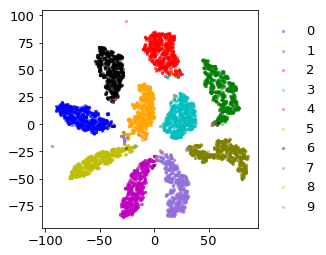

In [270]:
#latest model
#tsne of test - mnist dataset
print("Computing t-SNE embedding")
tsne_pred = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne_pred = tsne_pred.fit_transform(processed)

plot_embedding(X_tsne_pred, y_test,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


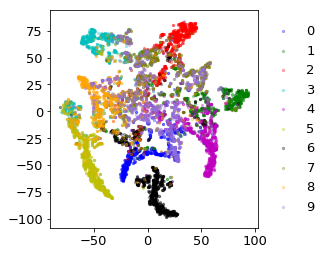

In [33]:
#latest model
#tsne of test - mnist dataset
print("Computing t-SNE embedding")
tsne_pred = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne_pred = tsne_pred.fit_transform(processed)

plot_embedding(X_tsne_pred, y_test1,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

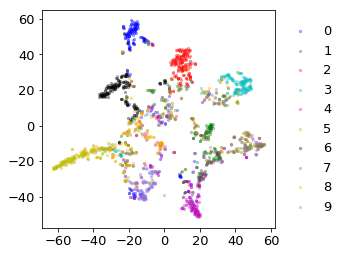

In [291]:
plot_embedding(X_tsne_pred, y_test1,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


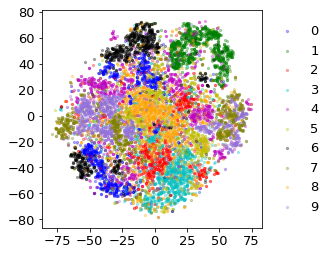

In [212]:
print("Computing t-SNE embedding")
tsne_pred = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne_pred = tsne_pred.fit_transform(processed)

plot_embedding(X_tsne_pred, y_test,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

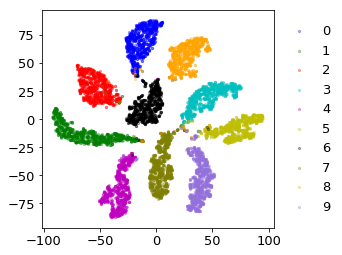

In [26]:
plot_embedding(X_tsne_pred, y_test,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


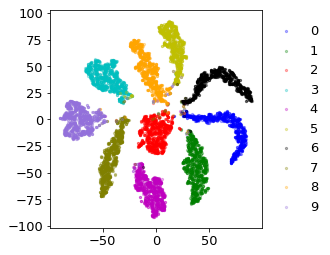

In [242]:
print("Computing t-SNE embedding")
tsne_pred = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne_pred = tsne_pred.fit_transform(processed)

plot_embedding(X_tsne_pred, y_test,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [34]:
X_train11=X_train.reshape(-1,28,28,1)
X_test11=X_test.reshape(-1,28,28,1)

In [35]:
processed_train=test_model.predict(X_train11)
processed_test=test_model.predict(X_test11)

In [36]:
num_pixels = 128
processed_train = processed_train.reshape(processed_train.shape[0], num_pixels).astype('float32')
processed_test = processed_test.reshape(processed_test.shape[0], num_pixels).astype('float32')

print(num_pixels)
print(processed_train.shape)
print(processed_test.shape)

128
(60000, 128)
(10000, 128)


In [37]:
from keras.utils import np_utils
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
num_classes = 10

In [38]:
# define baseline model
def baseline_model1():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [39]:

# build the model
model1 = baseline_model1()
# Fit the model
model1.fit(processed_train, y_train1, validation_data=(processed_test, y_test1), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores_test = model1.evaluate(processed_test, y_test1, verbose=1)
scores_train = model1.evaluate(processed_train, y_train1, verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.6940 - acc: 0.9595 - val_loss: 0.0794 - val_acc: 0.9858
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0398 - acc: 0.9931 - val_loss: 0.0587 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0302 - acc: 0.9934 - val_loss: 0.0562 - val_acc: 0.9866
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0279 - acc: 0.9933 - val_loss: 0.0558 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0270 - acc: 0.9935 - val_loss: 0.0559 - val_acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0265 - acc: 0.9936 - val_loss: 0.0548 - val_acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0261 - acc: 0.9936 - val_loss: 0.0548 - val_acc

In [40]:
#scores_train=scores_train/1.0
#scores_test=scores_test/1.0
print('* Accuracy on training set: %0.2f%%' % (100 * scores_train[1]))
print('* Accuracy on test set: %0.2f%%' % (100 * scores_test[1]))

* Accuracy on training set: 99.39%
* Accuracy on test set: 98.70%


In [41]:
y_test2=[]
for i in range(0,10):
    for j in range(300,1300):
        y_test2.append(i)
y_test2=np.array(y_test2)
print(y_test2.size)

10000


In [42]:
from keras.utils import np_utils
y_test2 = np_utils.to_categorical(y_test2)
num_classes = 10

In [43]:
scores_test_USPS=model1.evaluate(processed, y_test2, verbose=1)
print('* Accuracy on test USPS set: %0.2f%%' % (100 * scores_test_USPS[1]))

10000/10000 [==============================] - 0s 24us/step
* Accuracy on test USPS set: 62.38%
